In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
df = pd.read_csv(r'L:\Practice Dataset for DS\GiveMeSomeCredit (2)\cs-training.csv')
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [4]:
df.shape

(150000, 12)

In [5]:
df.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

# Data Preprocessing

In [6]:
# filling out missing values since number of missing value are very high. So we cannot drop them.

In [7]:
mode_nod = df['NumberOfDependents'].mode()[0]
mode_nod

0.0

In [8]:
df['NumberOfDependents'].fillna(value = mode_nod, inplace=True)

In [9]:
df['MonthlyIncome'].fillna(value=df['MonthlyIncome'].median(), inplace=True)

In [10]:
df.isna().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [11]:
# drop unwanted column
df.drop(columns = 'Unnamed: 0', inplace=True)

# EDA

### Univariate Analysis

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

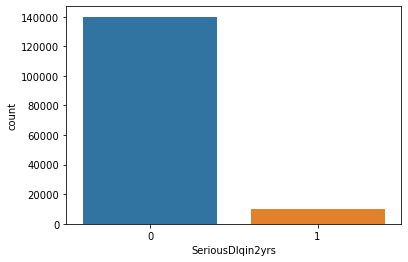

In [12]:
sns.countplot(df['SeriousDlqin2yrs'])

<AxesSubplot:ylabel='SeriousDlqin2yrs'>

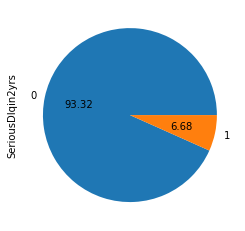

In [13]:
df['SeriousDlqin2yrs'].value_counts().plot(kind='pie', autopct='%.2f')

<AxesSubplot:xlabel='age', ylabel='Count'>

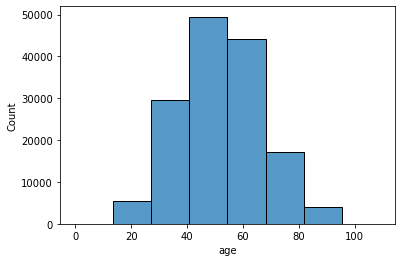

In [14]:
sns.histplot(df['age'], bins=8)

most of people are from age group 40-70 years

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

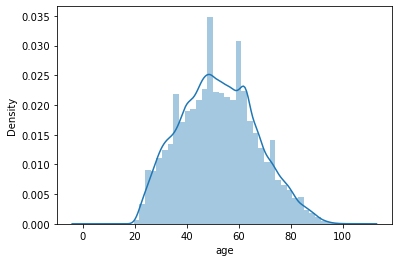

In [15]:
sns.distplot(df['age'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

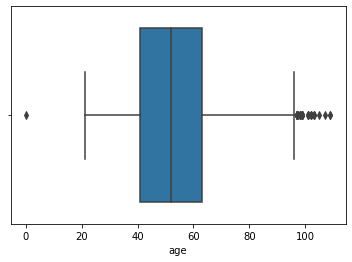

In [16]:
sns.boxplot(df['age'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome'>

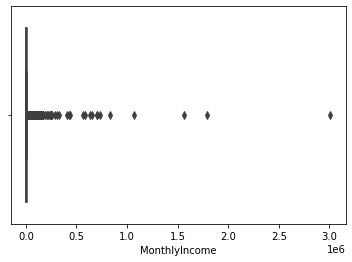

In [17]:
sns.boxplot(df['MonthlyIncome'])

# Multivariate Analysis

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='MonthlyIncome'>

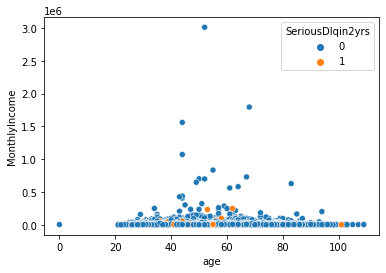

In [18]:
sns.scatterplot(df['age'], df['MonthlyIncome'], hue = df['SeriousDlqin2yrs'])

As we can see that monthly income and age affect on column 'SeriousDlqin2yrs'

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DebtRatio', ylabel='MonthlyIncome'>

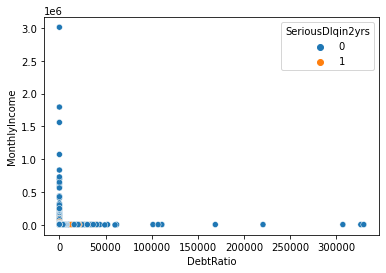

In [19]:
sns.scatterplot(df['DebtRatio'], df['MonthlyIncome'], hue = df['SeriousDlqin2yrs'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='SeriousDlqin2yrs'>

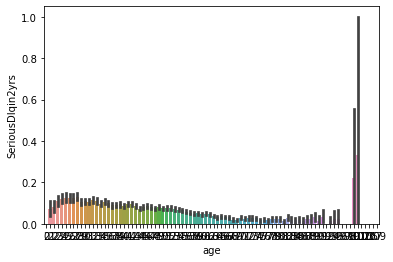

In [20]:
sns.barplot(df['age'],df['SeriousDlqin2yrs'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumberOfTime30-59DaysPastDueNotWorse', ylabel='SeriousDlqin2yrs'>

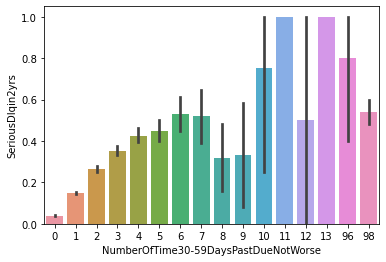

In [21]:
sns.barplot(df['NumberOfTime30-59DaysPastDueNotWorse'], df['SeriousDlqin2yrs'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

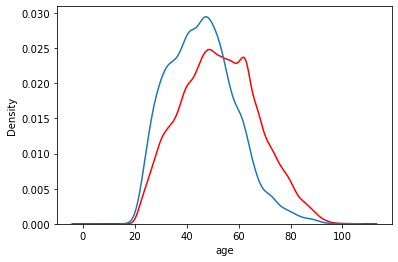

In [22]:
sns.distplot(df[df['SeriousDlqin2yrs']==0]['age'], hist=False, color='red')
sns.distplot(df[df['SeriousDlqin2yrs']==1]['age'], hist=False)


In [23]:
pd.crosstab(df['SeriousDlqin2yrs'], df['NumberOfTimes90DaysLate'])

NumberOfTimes90DaysLate,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,96,98
SeriousDlqin2yrs,,,,,,,,,,,,,,,,,,,
0,135108,3478,779,282,96,48,32,7,6,5,3,2,1,2,1,2,0,1,121
1,6554,1765,776,385,195,83,48,31,15,14,5,3,1,2,1,0,1,4,143


<AxesSubplot:xlabel='NumberOfTimes90DaysLate', ylabel='SeriousDlqin2yrs'>

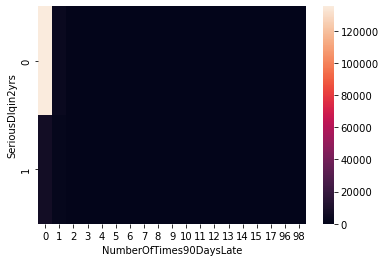

In [24]:
sns.heatmap(pd.crosstab(df['SeriousDlqin2yrs'], df['NumberOfTimes90DaysLate']))

In [25]:
df['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
x = df.drop(columns = 'SeriousDlqin2yrs')
y = df['SeriousDlqin2yrs']

In [28]:
x_res, y_res = SMOTE().fit_resample(x,y)

In [29]:
y_res.value_counts()

1    139974
0    139974
Name: SeriousDlqin2yrs, dtype: int64

# spliting training and testing data

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, random_state=0, test_size=0.4)

# feature scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
ss = StandardScaler()

In [34]:
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [35]:
x_train

array([[-0.0206136 ,  0.28496375, -0.13651268, ..., -0.77245608,
        -0.0995343 , -0.76773632],
       [-0.02433568,  1.42827143, -0.01455624, ...,  0.11731297,
        -0.0995343 , -0.47117024],
       [-0.02232921, -1.85873816, -0.13651268, ..., -0.77245608,
        -0.0995343 , -0.76773632],
       ...,
       [-0.02372902, -0.71543048, -0.13651268, ..., -0.77245608,
         0.02259093, -0.76773632],
       [-0.02413151, -0.35814682, -0.13651268, ...,  1.00708203,
        -0.0995343 , -0.76773632],
       [-0.02754527,  1.78555508, -0.13651268, ..., -0.77245608,
        -0.0995343 , -0.76773632]])

# Model Builing

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()

In [38]:
lr.fit(x_train,y_train)

LogisticRegression()

In [39]:
y_pred1 = lr.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_pred1, y_test)

0.65827826397571

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [43]:
print('Precision Score: ',precision_score(y_test, y_pred1))
print('Recall Score: ',recall_score(y_test, y_pred1))
print('f1 Score: ',f1_score(y_test, y_pred1))

Precision Score:  0.6599733969862065
Recall Score:  0.6488132557098074
f1 Score:  0.654345744584756


# KNeighbor Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knc = KNeighborsClassifier()

In [46]:
knc.fit(x_train, y_train)

KNeighborsClassifier()

In [47]:
y_pred3 = knc.predict(x_test)
y_pred3

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [48]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred3))
print('Precision Score: ',precision_score(y_test, y_pred3))
print('Recall Score: ',recall_score(y_test, y_pred3))
print('f1 Score: ',f1_score(y_test, y_pred3))

Accuracy Score:  0.8004286479728523
Precision Score:  0.817721086498491
Recall Score:  0.7716972682489924
f1 Score:  0.7940428355512958


# Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dtc = DecisionTreeClassifier()

In [51]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [52]:
y_pred4 = dtc.predict(x_test)

In [53]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred4))
print('Precision Score: ',precision_score(y_test, y_pred4))
print('Recall Score: ',recall_score(y_test, y_pred4))
print('f1 Score: ',f1_score(y_test, y_pred4))

Accuracy Score:  0.8684140025004465
Precision Score:  0.8562634389956302
Recall Score:  0.8845320197044335
f1 Score:  0.8701682042064268


# Random Forest Classsifer

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc = RandomForestClassifier()

In [56]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [57]:
y_pred5 = rfc.predict(x_test)

In [58]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred5))
print('Precision Score: ',precision_score(y_test, y_pred5))
print('Recall Score: ',recall_score(y_test, y_pred5))
print('f1 Score: ',f1_score(y_test, y_pred5))

Accuracy Score:  0.9042954098946241
Precision Score:  0.9050792054312295
Recall Score:  0.9026959247648902
f1 Score:  0.9038859940988134


# Gradient Boost

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
gbc = GradientBoostingClassifier()

In [61]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [62]:
y_pred6 = gbc.predict(x_test)

In [63]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred6))
print('Precision Score: ',precision_score(y_test, y_pred6))
print('Recall Score: ',recall_score(y_test, y_pred6))
print('f1 Score: ',f1_score(y_test, y_pred6))

Accuracy Score:  0.8633238078228255
Precision Score:  0.876804047016813
Recall Score:  0.8444961934617107
f1 Score:  0.8603469199675163


In [66]:
gv = pd.DataFrame({'Model':['LogisticRegression',
                            'KNeighborsClassifier','DecisionTreeClassifier',
                            'RandomForestClassifier','GradientBoostingClassifier'],
                  'Accuracy_Score': [accuracy_score(y_test, y_pred1),                                
                                    accuracy_score(y_test, y_pred3),
                                    accuracy_score(y_test, y_pred4),
                                    accuracy_score(y_test, y_pred5),
                                    accuracy_score(y_test, y_pred6)]})
gv

,Model,Accuracy_Score
0,LogisticRegression,0.658278
1,KNeighborsClassifier,0.800429
2,DecisionTreeClassifier,0.868414
3,RandomForestClassifier,0.904295
4,GradientBoostingClassifier,0.863324


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


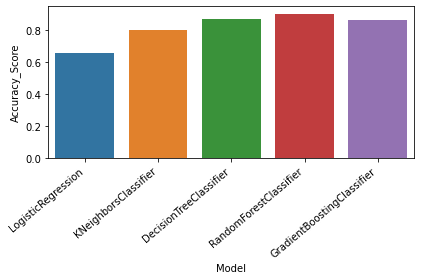

In [67]:
ax = sns.barplot(gv['Model'], gv['Accuracy_Score'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [68]:
gv_ps = pd.DataFrame({'Model':['LogisticRegression',
                            'KNeighborsClassifier','DecisionTreeClassifier',
                            'RandomForestClassifier','GradientBoostingClassifier'],
                  'Precision_score': [precision_score(y_test, y_pred1),                                    
                                    precision_score(y_test, y_pred3),
                                    precision_score(y_test, y_pred4),
                                    precision_score(y_test, y_pred5),
                                    precision_score(y_test, y_pred6)]})
gv_ps

,Model,Precision_score
0,LogisticRegression,0.659973
1,KNeighborsClassifier,0.817721
2,DecisionTreeClassifier,0.856263
3,RandomForestClassifier,0.905079
4,GradientBoostingClassifier,0.876804


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


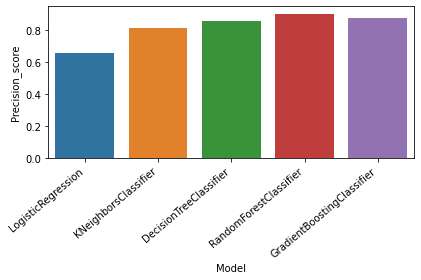

In [69]:
ax = sns.barplot(gv['Model'], gv_ps['Precision_score'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

From above result we can clearly seaa that Random Forest Classifier gave highest accuracy as well as precision score.
So we use use Random Forest Classifier for predictive Modelling.

In [70]:
# # we have to train our model on entire dataset 

In [72]:
x_res = ss.fit_transform(x_res)

In [73]:
# use highest accuracy score giver model i.e Random Forest Classifier

rfc.fit(x_res, y_res)

RandomForestClassifier()

# Save Model

In [74]:
# save model

import joblib

joblib.dump(rfc, 'financial distress_identifier')

['financial distress_identifier']

## Making Prediction on Testing Dataset

In [76]:
test = pd.read_csv(r'L:\Practice Dataset for DS\GiveMeSomeCredit (2)\cs-test.csv')
test

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

In [79]:
test.isna().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [80]:
# Data Preprocessing

In [81]:
mode_test = test['NumberOfDependents'].mode()[0]
mode_test

0.0

In [84]:
test['NumberOfDependents'].fillna(value = mode_test, inplace=True)
test['MonthlyIncome'].fillna(value = test['MonthlyIncome'].median(), inplace=True)

In [85]:
test.isna().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

In [87]:
test.drop(columns = 'Unnamed: 0', inplace=True)

In [88]:
x_test1 = test.drop(columns = 'SeriousDlqin2yrs')
x_test1

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
101498,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,0.081596,70,0,836.000000,5400.0,3,0,0,0,0.0
101501,0.335457,56,0,3568.000000,5400.0,8,0,2,1,3.0


In [89]:
# load our model

In [90]:
model = joblib.load('financial distress_identifier')

In [94]:
y_test_pred = model.predict(x_test1)
pred = pd.Series(y_test_pred)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [95]:
test['SeriousDlqin2yrs'].fillna(value= pred, inplace=True)

In [96]:
test.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [97]:
test.to_csv('prediction.csv', index=False)